In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xlwings as xw

In [10]:
def table1():
    wb = xw.Book.caller()
    sht = wb.sheets[0]
    
    df = pd.read_csv("offline0721.csv")
    MODEL_NO = ' ' #產品
    Tool_ID = 'ABIEXL10' #機台
    ABBR_NO = '6P' #光罩
    fliter = (df["XML_TOOL_ID"] == Tool_ID) & (df["XML_ABBR_NO"] == ABBR_NO)
    df_CD = df[fliter].drop(df.columns[1:5], axis=1)
    sns.distplot(df_CD['Y']);
    sht.range('A8').value = df_CD['Y'].skew()
    sht.range('A9').value = df_CD['Y'].kurt()
    #print("Skewness: %f" % df_CD['Y'].skew())
    #print("Kurtosis: %f" % df_CD['Y'].kurt())
    
    #return df_CD.describe()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 0.285785
Kurtosis: -0.244743


LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
count   1.160000e+02          116.0   1.160000e+02   1.160000e+02   
mean    1.740000e+01            2.0   1.080000e+00   1.060000e+00   
std     3.924940e-14            0.0   1.561055e-15   1.561055e-15   
min     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
25%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
50%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
75%     1.740000e+01            2.0   1.080000e+00   1.060000e+00   
max     1.740000e+01            2.0   1.080000e+00   1.060000e+00   

       LC_NZLSPDMENT  LC_COTPRESS     LC_TEMP      LC_HUM   SHP_TEMP1  \
count     116.000000   116.000000  116.000000  116.000000  116.000000   
mean       79.971552     3.125000   22.737069   58.637931  110.106034   
std         0.052430     0.050862    0.128219    0.651374    0.044309   
min        79.900000     3.000000   22.500000   57.000000  110.000000   
25%        79.900000     3.100000   22.700000   58.000000  110.100000   
50%        80.000000     3.100000   22.700000   59.000000  110.100000   
75%        80.000000     3.200000   22.800000   59.000000  110.100000   
max        80.100000     3.200000   23.300000   60.000000  110.200000   

        SHP_TEMP2  ...         AIRN2         VAC       LPILL        LPILR  \
count  116.000000  ...  1.160000e+02  116.000000   116.00000   116.000000   
mean   110.078448  ...  7.000000e-01  -85.974138  3269.25000  3144.060345   
std      0.054063  ...  1.561055e-15    0.625004    54.07529    75.966273   
min    109.900000  ...  7.000000e-01  -88.000000  3186.00000  2974.000000   
25%    110.000000  ...  7.000000e-01  -86.000000  3230.00000  3105.000000   
50%    110.100000  ...  7.000000e-01  -86.000000  3252.00000  3135.000000   
75%    110.100000  ...  7.000000e-01  -86.000000  3328.00000  3196.000000   
max    110.200000  ...  7.000000e-01  -84.000000  3359.00000  3296.000000   

             LPILA          LPL          LPR   SCANSPEED     ILLM_AVG  \
count   116.000000   116.000000   116.000000  116.000000   116.000000   
mean   3307.198276  7447.534483  7352.172414  177.379310  4426.287672   
std      30.006730   381.378927   377.035744    3.332724     3.430931   
min    3264.000000  6638.000000  6594.000000  170.000000  4421.880000   
25%    3268.500000  7227.750000  7047.500000  175.000000  4423.030000   
50%    3306.000000  7480.500000  7425.500000  177.000000  4425.480000   
75%    3330.000000  7723.750000  7662.750000  179.000000  4429.652500   
max    3357.000000  8293.000000  8091.000000  183.000000  4431.490000   

                Y  
count  116.000000  
mean     6.326319  
std      0.088463  
min      6.151000  
25%      6.263000  
50%      6.322000  
75%      6.382000  
max      6.559000  

[8 rows x 62 columns]

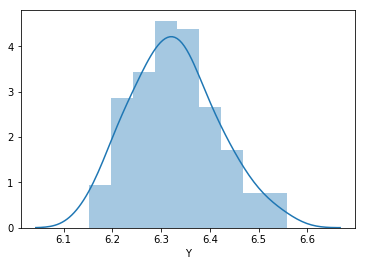

In [21]:
file()

In [ ]:
df_CD['Y']

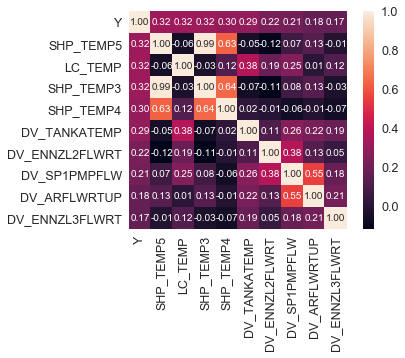

In [11]:
corrmat_df_CD = df_CD.corr()
k = 10 #number ofvariables for heatmap
cols = corrmat_df_CD.nlargest(k, 'Y')['Y'].index
cm = np.corrcoef(df_CD[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
st=pd.DataFrame(data=corrmat_df_CD['Y']) 
st.sort_values(by="Y",ascending=False).head(20) 

Y
Y               1.000000
SHP_TEMP5       0.323653
LC_TEMP         0.322314
SHP_TEMP3       0.316998
SHP_TEMP4       0.300043
DV_TANKATEMP    0.292256
DV_ENNZL2FLWRT  0.222832
DV_SP1PMPFLW    0.213600
DV_ARFLWRTUP    0.177585
DV_ENNZL3FLWRT  0.172365
DV_ENNZL1FLWRT  0.158887
SHP_TEMP6       0.158571
SCANSPEED       0.149683
DV_DWSPFLWRTR2  0.127316
LPL             0.087497
SHP_TEMP1       0.077372
LPR             0.075058
DV_ARFLWRTLW    0.071808
TMPP            0.067290
DV_SP3PMPFLW    0.061835

In [13]:
df_CD.isnull().sum()[df_CD.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
#------5.2 創建數據-------#
train_x=df_CD.drop(columns=['SCANSPEED']) #特徵(feature)
train_y=df_CD['SCANSPEED']                #目標(Target)

#------5.3 建立模型-------#
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=42)

In [15]:
X_train

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29     6P0B39694           17.4            2.0           1.08           1.06   
113    6P0B4LT5A           17.4            2.0           1.08           1.06   
329    6P0B5AP34           17.4            2.0           1.08           1.06   
366    6P0B5CH84           17.4            2.0           1.08           1.06   
98     6P0B4J854           17.4            2.0           1.08           1.06   
..           ...            ...            ...            ...            ...   
798    6P0B74U8A           17.4            2.0           1.08           1.06   
40     6P0B3B01A           17.4            2.0           1.08           1.06   
636    6P0B67E8A           17.4            2.0           1.08           1.06   
246    6P0B5616A           17.4            2.0           1.08           1.06   
786    6P0B7497A           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
29            79.9          3.2     22.8    58.0      110.1  ...      0.7   
113           80.0          3.1     22.8    58.0      110.2  ...      0.7   
329           80.0          3.2     22.6    59.0      110.1  ...      0.7   
366           80.0          3.1     22.6    59.0      110.1  ...      0.7   
98            79.9          3.1     22.8    59.0      110.1  ...      0.7   
..             ...          ...      ...     ...        ...  ...      ...   
798           80.0          3.1     22.7    58.0      110.1  ...      0.7   
40            80.0          3.1     22.7    59.0      110.1  ...      0.7   
636           80.0          3.1     23.0    57.0      110.1  ...      0.7   
246           80.0          3.1     22.7    59.0      110.1  ...      0.7   
786           80.0          3.2     22.7    59.0      110.1  ...      0.7   

     AIRN2  VAC  LPILL  LPILR  LPILA   LPL   LPR  ILLM_AVG      Y  
29     0.7  -87   3308   3218   3325  7380  7209   4423.03  6.385  
113    0.7  -86   3188   3135   3328  7749  7727   4423.11  6.242  
329    0.7  -85   3330   3110   3306  7393  7129   4431.49  6.211  
366    0.7  -85   3271   3118   3306  7310  7273   4431.49  6.366  
98     0.7  -86   3191   3169   3328  7673  7659   4422.74  6.282  
..     ...  ...    ...    ...    ...   ...   ...       ...    ...  
798    0.7  -86   3345   3296   3354  6638  6609   4424.21  6.486  
40     0.7  -87   3262   3162   3328  7483  7280   4421.88  6.486  
636    0.7  -87   3242   3015   3269  7822  7693   4428.26  6.559  
246    0.7  -85   3328   3188   3306  7051  6990   4427.88  6.297  
786    0.7  -86   3242   2986   3269  8262  8044   4425.02  6.437  

[81 rows x 62 columns]

In [16]:
X_test

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577    910B63L9A           17.4            2.0           1.08           1.06   
24     6P0B38Q5A           17.4            2.0           1.08           1.06   
158    6P0B4RK84           17.4            2.0           1.08           1.06   
154    6P0B4RA04           17.4            2.0           1.08           1.06   
32     910B3995A           17.4            2.0           1.08           1.06   
220    6P0B54A7A           17.4            2.0           1.08           1.06   
808    6P0B76B7A           17.4            2.0           1.08           1.06   
119    6P0B4LT7A           17.4            2.0           1.08           1.06   
473    6P0B5HM24           17.4            2.0           1.08           1.06   
33     910B39954           17.4            2.0           1.08           1.06   
203    6P0B53F0A           17.4            2.0           1.08           1.06   
96     6P0B4J85A           17.4            2.0           1.08           1.06   
640    6P0B65W0A           17.4            2.0           1.08           1.06   
254    6P0B55U2A           17.4            2.0           1.08           1.06   
46     6P0B3B80A           17.4            2.0           1.08           1.06   
0      6P0B3504A           17.4            2.0           1.08           1.06   
267    6P0B57C54           17.4            2.0           1.08           1.06   
602    6P0B6597A           17.4            2.0           1.08           1.06   
801    6P0B74U54           17.4            2.0           1.08           1.06   
782    6P0B73Y7A           17.4            2.0           1.08           1.06   
637    6P0B67E81           17.4            2.0           1.08           1.06   
609    6P0B65R5A           17.4            2.0           1.08           1.06   
429    910B5FA9A           17.4            2.0           1.08           1.06   
36     910B3A96A           17.4            2.0           1.08           1.06   
41     6P0B3B014           17.4            2.0           1.08           1.06   
430    910B5FA94           17.4            2.0           1.08           1.06   
111    6P0B4LH1A           17.4            2.0           1.08           1.06   
85     6P0B3H45A           17.4            2.0           1.08           1.06   
266    6P0B57C5A           17.4            2.0           1.08           1.06   
83     6P0B3GT4A           17.4            2.0           1.08           1.06   
298    6P0B59264           17.4            2.0           1.08           1.06   
907    6P0B7BZ0A           17.4            2.0           1.08           1.06   
541    910B61574           17.4            2.0           1.08           1.06   
100    6P0B4JB04           17.4            2.0           1.08           1.06   
578    910B63L94           17.4            2.0           1.08           1.06   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP  LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
577           79.9          3.1     22.7    59.0      110.1  ...      0.7   
24            80.0          3.1     22.8    58.0      110.1  ...      0.7   
158           80.0          3.2     22.7    59.0      110.1  ...      0.7   
154           80.0          3.1     22.8    58.0      110.1  ...      0.7   
32            80.0          3.1     22.8    59.0      110.1  ...      0.7   
220           80.0          3.1     22.7    60.0      110.1  ...      0.7   
808           80.0          3.1     22.8    58.0      110.1  ...      0.7   
119           79.9          3.2     22.7    58.0      110.2  ...      0.7   
473           80.0          3.1     22.7    59.0      110.1  ...      0.7   
33            79.9          3.1     22.7    58.0      110.1  ...      0.7   
203           80.0          3.1     22.6    59.0      110.1  ...      0.7   
96            79.9          3.1     22.7    59.0      110.1  ...      0.7   
640           80.0          3.1     23.2    57.0      110.1  ...      0.7   
254           80.0          3.1     22.7    5

In [17]:
#----4.1 數值型資料，做標準化-----#
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

for i in X_train.columns:
    if X_train[i].dtype != 'object':
        X_train[i] = scaler.fit_transform(X_train[[i]])
        X_test[i] = scaler.transform(X_test[[i]])
X_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29     6P0B39694            0.0            0.0            0.0            0.0   
113    6P0B4LT5A            0.0            0.0            0.0            0.0   
329    6P0B5AP34            0.0            0.0            0.0            0.0   
366    6P0B5CH84            0.0            0.0            0.0            0.0   
98     6P0B4J854            0.0            0.0            0.0            0.0   
..           ...            ...            ...            ...            ...   
798    6P0B74U8A            0.0            0.0            0.0            0.0   
40     6P0B3B01A            0.0            0.0            0.0            0.0   
636    6P0B67E8A            0.0            0.0            0.0            0.0   
246    6P0B5616A            0.0            0.0            0.0            0.0   
786    6P0B7497A            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
29             0.0          1.0    0.375  0.333333        0.5  ...      0.0   
113            0.5          0.5    0.375  0.333333        1.0  ...      0.0   
329            0.5          1.0    0.125  0.666667        0.5  ...      0.0   
366            0.5          0.5    0.125  0.666667        0.5  ...      0.0   
98             0.0          0.5    0.375  0.666667        0.5  ...      0.0   
..             ...          ...      ...       ...        ...  ...      ...   
798            0.5          0.5    0.250  0.333333        0.5  ...      0.0   
40             0.5          0.5    0.250  0.666667        0.5  ...      0.0   
636            0.5          0.5    0.625  0.000000        0.5  ...      0.0   
246            0.5          0.5    0.250  0.666667        0.5  ...      0.0   
786            0.5          1.0    0.250  0.666667        0.5  ...      0.0   

     AIRN2   VAC     LPILL     LPILR     LPILA       LPL       LPR  ILLM_AVG  \
29     0.0  0.25  0.757764  0.757764  0.655914  0.448338  0.418367  0.119667   
113    0.0  0.50  0.012422  0.500000  0.688172  0.671299  0.770748  0.127992   
329    0.0  0.75  0.894410  0.422360  0.451613  0.456193  0.363946  1.000000   
366    0.0  0.75  0.527950  0.447205  0.451613  0.406042  0.461905  1.000000   
98     0.0  0.50  0.031056  0.605590  0.688172  0.625378  0.724490  0.089490   
..     ...   ...       ...       ...       ...       ...       ...       ...   
798    0.0  0.50  0.987578  1.000000  0.967742  0.000000  0.010204  0.242456   
40     0.0  0.25  0.472050  0.583851  0.688172  0.510574  0.466667  0.000000   
636    0.0  0.25  0.347826  0.127329  0.053763  0.715408  0.747619  0.663892   
246    0.0  0.75  0.881988  0.664596  0.451613  0.249547  0.269388  0.624350   
786    0.0  0.50  0.347826  0.037267  0.053763  0.981269  0.986395  0.326743   

            Y  
29   0.561713  
113  0.201511  
329  0.123426  
366  0.513854  
98   0.302267  
..        ...  
798  0.816121  
40   0.816121  
636  1.000000  
246  0.340050  
786  0.692695  

[81 rows x 62 columns]

In [18]:
X_test

XML_SHEET_ID  LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577    910B63L9A            0.0            0.0            0.0            0.0   
24     6P0B38Q5A            0.0            0.0            0.0            0.0   
158    6P0B4RK84            0.0            0.0            0.0            0.0   
154    6P0B4RA04            0.0            0.0            0.0            0.0   
32     910B3995A            0.0            0.0            0.0            0.0   
220    6P0B54A7A            0.0            0.0            0.0            0.0   
808    6P0B76B7A            0.0            0.0            0.0            0.0   
119    6P0B4LT7A            0.0            0.0            0.0            0.0   
473    6P0B5HM24            0.0            0.0            0.0            0.0   
33     910B39954            0.0            0.0            0.0            0.0   
203    6P0B53F0A            0.0            0.0            0.0            0.0   
96     6P0B4J85A            0.0            0.0            0.0            0.0   
640    6P0B65W0A            0.0            0.0            0.0            0.0   
254    6P0B55U2A            0.0            0.0            0.0            0.0   
46     6P0B3B80A            0.0            0.0            0.0            0.0   
0      6P0B3504A            0.0            0.0            0.0            0.0   
267    6P0B57C54            0.0            0.0            0.0            0.0   
602    6P0B6597A            0.0            0.0            0.0            0.0   
801    6P0B74U54            0.0            0.0            0.0            0.0   
782    6P0B73Y7A            0.0            0.0            0.0            0.0   
637    6P0B67E81            0.0            0.0            0.0            0.0   
609    6P0B65R5A            0.0            0.0            0.0            0.0   
429    910B5FA9A            0.0            0.0            0.0            0.0   
36     910B3A96A            0.0            0.0            0.0            0.0   
41     6P0B3B014            0.0            0.0            0.0            0.0   
430    910B5FA94            0.0            0.0            0.0            0.0   
111    6P0B4LH1A            0.0            0.0            0.0            0.0   
85     6P0B3H45A            0.0            0.0            0.0            0.0   
266    6P0B57C5A            0.0            0.0            0.0            0.0   
83     6P0B3GT4A            0.0            0.0            0.0            0.0   
298    6P0B59264            0.0            0.0            0.0            0.0   
907    6P0B7BZ0A            0.0            0.0            0.0            0.0   
541    910B61574            0.0            0.0            0.0            0.0   
100    6P0B4JB04            0.0            0.0            0.0            0.0   
578    910B63L94            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  ...  AIRCOL2  \
577            0.0          0.5    0.250  0.666667        0.5  ...      0.0   
24             0.5          0.5    0.375  0.333333        0.5  ...      0.0   
158            0.5          1.0    0.250  0.666667        0.5  ...      0.0   
154            0.5          0.5    0.375  0.333333        0.5  ...      0.0   
32             0.5          0.5    0.375  0.666667        0.5  ...      0.0   
220            0.5          0.5    0.250  1.000000        0.5  ...      0.0   
808            0.5          0.5    0.375  0.333333        0.5  ...      0.0   
119            0.0          1.0    0.250  0.333333        1.0  ...      0.0   
473            0.5          0.5    0.250  0.666667        0.5  ...      0.0   
33             0.0          0.5    0.250  0.333333        0.5  ...      0.0   
203            0.5          0.5    0.125  0.666667        0.5  ...      0.0   
96             0.0          0.5    0.250  0.666667        0.5  ...      0.0   
640            0.5          0.5    0.875  0.000000        0.5  ...      0.0   
254            0.

In [19]:
X_train = X_train.drop('XML_SHEET_ID',1)
X_test = X_test.drop('XML_SHEET_ID',1)
X_train

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
29             0.0            0.0            0.0            0.0   
113            0.0            0.0            0.0            0.0   
329            0.0            0.0            0.0            0.0   
366            0.0            0.0            0.0            0.0   
98             0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
798            0.0            0.0            0.0            0.0   
40             0.0            0.0            0.0            0.0   
636            0.0            0.0            0.0            0.0   
246            0.0            0.0            0.0            0.0   
786            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
29             0.0          1.0    0.375  0.333333        0.5   0.666667  ...   
113            0.5          0.5    0.375  0.333333        1.0   0.666667  ...   
329            0.5          1.0    0.125  0.666667        0.5   1.000000  ...   
366            0.5          0.5    0.125  0.666667        0.5   0.666667  ...   
98             0.0          0.5    0.375  0.666667        0.5   0.666667  ...   
..             ...          ...      ...       ...        ...        ...  ...   
798            0.5          0.5    0.250  0.333333        0.5   0.333333  ...   
40             0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
636            0.5          0.5    0.625  0.000000        0.5   0.666667  ...   
246            0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
786            0.5          1.0    0.250  0.666667        0.5   0.666667  ...   

     AIRCOL2  AIRN2   VAC     LPILL     LPILR     LPILA       LPL       LPR  \
29       0.0    0.0  0.25  0.757764  0.757764  0.655914  0.448338  0.418367   
113      0.0    0.0  0.50  0.012422  0.500000  0.688172  0.671299  0.770748   
329      0.0    0.0  0.75  0.894410  0.422360  0.451613  0.456193  0.363946   
366      0.0    0.0  0.75  0.527950  0.447205  0.451613  0.406042  0.461905   
98       0.0    0.0  0.50  0.031056  0.605590  0.688172  0.625378  0.724490   
..       ...    ...   ...       ...       ...       ...       ...       ...   
798      0.0    0.0  0.50  0.987578  1.000000  0.967742  0.000000  0.010204   
40       0.0    0.0  0.25  0.472050  0.583851  0.688172  0.510574  0.466667   
636      0.0    0.0  0.25  0.347826  0.127329  0.053763  0.715408  0.747619   
246      0.0    0.0  0.75  0.881988  0.664596  0.451613  0.249547  0.269388   
786      0.0    0.0  0.50  0.347826  0.037267  0.053763  0.981269  0.986395   

     ILLM_AVG         Y  
29   0.119667  0.561713  
113  0.127992  0.201511  
329  1.000000  0.123426  
366  1.000000  0.513854  
98   0.089490  0.302267  
..        ...       ...  
798  0.242456  0.816121  
40   0.000000  0.816121  
636  0.663892  1.000000  
246  0.624350  0.340050  
786  0.326743  0.692695  

[81 rows x 61 columns]

In [20]:
X_test

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577            0.0            0.0            0.0            0.0   
24             0.0            0.0            0.0            0.0   
158            0.0            0.0            0.0            0.0   
154            0.0            0.0            0.0            0.0   
32             0.0            0.0            0.0            0.0   
220            0.0            0.0            0.0            0.0   
808            0.0            0.0            0.0            0.0   
119            0.0            0.0            0.0            0.0   
473            0.0            0.0            0.0            0.0   
33             0.0            0.0            0.0            0.0   
203            0.0            0.0            0.0            0.0   
96             0.0            0.0            0.0            0.0   
640            0.0            0.0            0.0            0.0   
254            0.0            0.0            0.0            0.0   
46             0.0            0.0            0.0            0.0   
0              0.0            0.0            0.0            0.0   
267            0.0            0.0            0.0            0.0   
602            0.0            0.0            0.0            0.0   
801            0.0            0.0            0.0            0.0   
782            0.0            0.0            0.0            0.0   
637            0.0            0.0            0.0            0.0   
609            0.0            0.0            0.0            0.0   
429            0.0            0.0            0.0            0.0   
36             0.0            0.0            0.0            0.0   
41             0.0            0.0            0.0            0.0   
430            0.0            0.0            0.0            0.0   
111            0.0            0.0            0.0            0.0   
85             0.0            0.0            0.0            0.0   
266            0.0            0.0            0.0            0.0   
83             0.0            0.0            0.0            0.0   
298            0.0            0.0            0.0            0.0   
907            0.0            0.0            0.0            0.0   
541            0.0            0.0            0.0            0.0   
100            0.0            0.0            0.0            0.0   
578            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
577            0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
24             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
158            0.5          1.0    0.250  0.666667        0.5   0.333333  ...   
154            0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
32             0.5          0.5    0.375  0.666667        0.5   0.666667  ...   
220            0.5          0.5    0.250  1.000000        0.5   0.333333  ...   
808            0.5          0.5    0.375  0.333333        0.5   0.333333  ...   
119            0.0          1.0    0.250  0.333333        1.0   0.666667  ...   
473            0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
33             0.0          0.5    0.250  0.333333        0.5   0.666667  ...   
203            0.5          0.5    0.125  0.666667        0.5   0.666667  ...   
96             0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
640            0.5          0.5    0.875  0.000000        0.5   0.666667  ...   
254            0.5          0.5    0.250  0.666667        1.0   0.666667  ...   
46             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
0              0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
267            0.5          1.0    0.125  0.666667        0.5   0.333333  ...   
602            0.5          0.5    0.500  0.333333        0.5   0.333333  ...   
801            0.0          1.0    0.375  0.666667   

In [21]:
XGB = XGBRegressor()
XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [22]:
#先用x train看預測出來的y train結果多少
XGB.predict(X_train)

array([178.99997, 175.00029, 174.99962, 182.99902, 174.99973, 176.99965,
       170.0001 , 178.99956, 175.00015, 183.00024, 178.99994, 175.00018,
       177.99998, 182.99965, 174.99957, 180.00204, 179.00026, 177.00005,
       182.9993 , 180.00018, 174.99994, 178.00035, 169.9998 , 175.00111,
       175.00027, 178.99957, 175.00009, 182.999  , 174.99991, 178.99979,
       174.9999 , 178.00003, 178.99901, 174.99992, 179.00078, 174.99966,
       175.0001 , 177.99966, 182.9997 , 183.0004 , 176.99997, 177.     ,
       177.00015, 182.99991, 169.99953, 179.99953, 177.99945, 176.99991,
       177.0003 , 178.00003, 174.99971, 176.99997, 179.99979, 175.     ,
       172.00035, 177.00067, 175.00044, 175.00018, 175.00014, 175.00055,
       174.99928, 175.00014, 183.00056, 178.99994, 175.00015, 177.9992 ,
       175.00005, 179.00081, 175.00041, 180.00012, 178.9996 , 179.00105,
       170.00006, 179.00023, 176.99979, 182.99963, 175.0004 , 182.9983 ,
       177.99954, 182.99997, 175.00003], dtype=floa

In [23]:
#實際答案
y_train

29     179.0
113    175.0
329    175.0
366    183.0
98     175.0
       ...  
798    175.0
40     183.0
636    178.0
246    183.0
786    175.0
Name: SCANSPEED, Length: 81, dtype: float64

In [24]:
#再用test看預測出來的y train結果多少
XGB.predict(X_test)

array([177.74728, 178.83229, 177.36028, 174.53496, 180.24716, 179.06575,
       170.04637, 176.35097, 179.59824, 179.16309, 176.71793, 175.01598,
       176.50053, 180.47469, 178.11378, 174.11833, 176.72336, 178.89493,
       172.23277, 175.78876, 176.39409, 177.15222, 175.58002, 175.73143,
       179.19144, 179.13315, 176.7023 , 177.30507, 179.7521 , 178.60306,
       180.13217, 171.50467, 178.95288, 175.89522, 178.43701],
      dtype=float32)

In [25]:
y_test

577    179.0
24     179.0
158    177.0
154    177.0
32     175.0
220    178.0
808    170.0
119    175.0
473    183.0
33     175.0
203    177.0
96     175.0
640    175.0
254    183.0
46     178.0
0      175.0
267    179.0
602    179.0
801    172.0
782    175.0
637    178.0
609    175.0
429    183.0
36     175.0
41     183.0
430    183.0
111    175.0
85     175.0
266    179.0
83     178.0
298    183.0
907    170.0
541    180.0
100    175.0
578    179.0
Name: SCANSPEED, dtype: float64

In [26]:
def mae_value(y_true, y_pred):
   #""引數: y_true -- 測試集目標真實值
   # y_pred -- 測試集目標預測值
   # 
   # 返回:
   # mae -- MAE 評價指標
    
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred))/n
    return mae

def mse_value(y_true, y_pred):
    #"""引數:
    #y_true -- 測試集目標真實值
    #y_pred -- 測試集目標預測值  
   # 返回:
   # mse -- MSE 評價指標
    
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred))/n
    return mse

def mape(y_true, y_pred):
    #"""
    #引數: 
    #y_true -- 測試集目標真實值
    #y_pred -- 測試集目標預測值
    
    #返回:
    #mape -- MAPE 評價指標    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [27]:
#MAE的值越小，說明預測模型擁有更好的精確度。
print(mae_value(XGB.predict(X_train), y_train)) 
#MSE的值越小，說明預測模型擁有更好的精確度。
print(mse_value(XGB.predict(X_train), y_train))
#MAPE的值越小，說明預測模型擁有更好的精確度。(單位:%)
print(mape(XGB.predict(X_train), y_train))

0.0003534010898919753
2.574819473572719e-07
0.00019812798116077584


In [28]:
print(mae_value(XGB.predict(X_test), y_test))
print(mse_value(XGB.predict(X_test), y_test))
print(mape(XGB.predict(X_test), y_test))

1.7162501743861607
5.619307611270675
0.9657337185058514


In [29]:
from sklearn.metrics import r2_score
r2_score(XGB.predict(X_train), y_train)

0.9999999756727517

In [30]:
r2_score(XGB.predict(X_test), y_test)

0.06089076371366253

In [31]:
X_test

LC_DISPENSQNT  LC_DPSSPDSET1  LC_DPSSPDSET2  LC_DPSSPDSET3  \
577            0.0            0.0            0.0            0.0   
24             0.0            0.0            0.0            0.0   
158            0.0            0.0            0.0            0.0   
154            0.0            0.0            0.0            0.0   
32             0.0            0.0            0.0            0.0   
220            0.0            0.0            0.0            0.0   
808            0.0            0.0            0.0            0.0   
119            0.0            0.0            0.0            0.0   
473            0.0            0.0            0.0            0.0   
33             0.0            0.0            0.0            0.0   
203            0.0            0.0            0.0            0.0   
96             0.0            0.0            0.0            0.0   
640            0.0            0.0            0.0            0.0   
254            0.0            0.0            0.0            0.0   
46             0.0            0.0            0.0            0.0   
0              0.0            0.0            0.0            0.0   
267            0.0            0.0            0.0            0.0   
602            0.0            0.0            0.0            0.0   
801            0.0            0.0            0.0            0.0   
782            0.0            0.0            0.0            0.0   
637            0.0            0.0            0.0            0.0   
609            0.0            0.0            0.0            0.0   
429            0.0            0.0            0.0            0.0   
36             0.0            0.0            0.0            0.0   
41             0.0            0.0            0.0            0.0   
430            0.0            0.0            0.0            0.0   
111            0.0            0.0            0.0            0.0   
85             0.0            0.0            0.0            0.0   
266            0.0            0.0            0.0            0.0   
83             0.0            0.0            0.0            0.0   
298            0.0            0.0            0.0            0.0   
907            0.0            0.0            0.0            0.0   
541            0.0            0.0            0.0            0.0   
100            0.0            0.0            0.0            0.0   
578            0.0            0.0            0.0            0.0   

     LC_NZLSPDMENT  LC_COTPRESS  LC_TEMP    LC_HUM  SHP_TEMP1  SHP_TEMP2  ...  \
577            0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
24             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
158            0.5          1.0    0.250  0.666667        0.5   0.333333  ...   
154            0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
32             0.5          0.5    0.375  0.666667        0.5   0.666667  ...   
220            0.5          0.5    0.250  1.000000        0.5   0.333333  ...   
808            0.5          0.5    0.375  0.333333        0.5   0.333333  ...   
119            0.0          1.0    0.250  0.333333        1.0   0.666667  ...   
473            0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
33             0.0          0.5    0.250  0.333333        0.5   0.666667  ...   
203            0.5          0.5    0.125  0.666667        0.5   0.666667  ...   
96             0.0          0.5    0.250  0.666667        0.5   0.666667  ...   
640            0.5          0.5    0.875  0.000000        0.5   0.666667  ...   
254            0.5          0.5    0.250  0.666667        1.0   0.666667  ...   
46             0.5          0.5    0.375  0.333333        0.5   0.666667  ...   
0              0.5          0.5    0.250  0.666667        0.5   0.666667  ...   
267            0.5          1.0    0.125  0.666667        0.5   0.333333  ...   
602            0.5          0.5    0.500  0.333333        0.5   0.333333  ...   
801            0.0          1.0    0.375  0.666667   